In [36]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
from math import pi
import sqlite3
import altair as alt

In [3]:
cnx = sqlite3.connect('database.sqlite')

In [4]:
messi = pd.read_sql("""SELECT player_name
                                    ,date
                                    ,overall_rating
                                    ,attacking_work_rate
                                    ,dribbling
                                    ,finishing
                                    ,shot_power
                                    ,penalties
                                    ,free_kick_accuracy
                                    ,sprint_speed,agility,acceleration
                                    
                        FROM Player 
                        LEFT JOIN Player_Attributes
                        on Player.player_api_id = Player_Attributes.player_api_id
                        
                        WHERE player_name = 'Lionel Messi'
                        
                       
                        ORDER by date
                        """, cnx)



pd.set_option('display.max_columns', None)
messi.head()

,player_name,date,overall_rating,attacking_work_rate,dribbling,finishing,shot_power,penalties,free_kick_accuracy,sprint_speed,agility,acceleration
0,Lionel Messi,2007-02-22 00:00:00,85,high,95,76,83,87,87,94,96,92
1,Lionel Messi,2007-08-30 00:00:00,86,high,95,80,84,87,70,95,96,95
2,Lionel Messi,2008-08-30 00:00:00,90,high,97,87,82,89,70,95,96,96
3,Lionel Messi,2009-02-22 00:00:00,90,high,97,87,79,91,76,93,96,96
4,Lionel Messi,2009-08-30 00:00:00,90,high,97,90,79,91,74,93,96,96


In [38]:
cris = pd.read_sql("""SELECT player_name
                                    ,date
                                    ,overall_rating
                                    ,attacking_work_rate
                                    ,dribbling
                                    ,finishing
                                    ,shot_power
                                    ,penalties
                                    ,free_kick_accuracy
                                    ,sprint_speed,agility,acceleration
                                    
                        FROM Player 
                        LEFT JOIN Player_Attributes
                        on Player.player_api_id = Player_Attributes.player_api_id
                        
                        WHERE player_name = 'Cristiano Ronaldo'
                        
                       
                        ORDER by date
                        """, cnx)



pd.set_option('display.max_columns', None)
cris.head()

,player_name,date,overall_rating,attacking_work_rate,dribbling,finishing,shot_power,penalties,free_kick_accuracy,sprint_speed,agility,acceleration
0,Cristiano Ronaldo,2007-02-22 00:00:00,87,high,95,71,80,64,64,93,94,91
1,Cristiano Ronaldo,2007-08-30 00:00:00,91,high,97,85,90,79,88,94,94,95
2,Cristiano Ronaldo,2008-08-30 00:00:00,91,high,97,92,92,78,94,94,94,95
3,Cristiano Ronaldo,2009-02-22 00:00:00,90,high,97,91,90,78,93,94,94,95
4,Cristiano Ronaldo,2009-08-30 00:00:00,89,high,93,90,91,86,88,92,94,92


In [39]:
crisMean = cris.mean()
messiMean = messi.mean()
print("Messi:\n",messiMean,"\n Cristiano:\n",crisMean)

Messi:
 date                  7.720003e+101
overall_rating         9.219231e+01
dribbling              9.646154e+01
finishing              9.223077e+01
shot_power             8.030769e+01
penalties              8.015385e+01
free_kick_accuracy     8.411538e+01
sprint_speed           9.084615e+01
agility                9.438462e+01
acceleration           9.530769e+01
dtype: float64 
 Cristiano:
 overall_rating        91.28
dribbling             92.64
finishing             91.12
shot_power            92.76
penalties             83.60
free_kick_accuracy    81.64
sprint_speed          93.76
agility               92.96
acceleration          91.64
dtype: float64


In [20]:
df = pd.DataFrame({"Player":["Lionel Messi","Cristiano Ronaldo"],"Dribling":[96.46,92.64],
                  "Finishing":[92.23,91.12],"Shot Power":[80.30,92.76],"Free Kick Accuracy":[84.11,81.64],
                  "Penalties":[80.15,83.60],"Sprint Speed":[90.84,93.76],"Agility":[94.38,92.96],
                   "Acceleration":[95.30,91.64]})

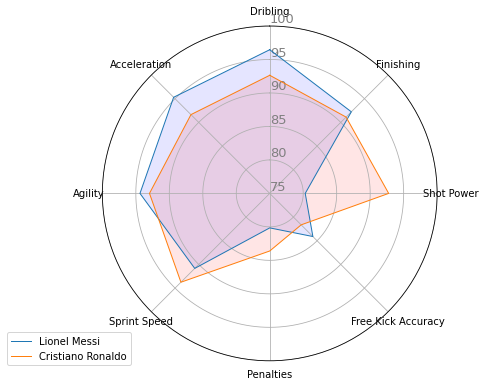

In [23]:
import matplotlib.pyplot as plt

from math import pi
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
fig = plt.figure(figsize=(6,15))
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([75,80,85,90,95,100], ["75","80","85","90","95","100"], color="grey", size=13)
plt.ylim(75,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('Player').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Lionel Messi")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('Player').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cristiano Ronaldo")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('MessiRadar.png', dpi=300,bbox_inches = "tight")


In [33]:
frames = [messi, cris]
df = pd.concat(frames)

df = df.reset_index()
df = df[["player_name","date","overall_rating"]]
df.head()

,player_name,date,overall_rating
0,Lionel Messi,2007,85
1,Lionel Messi,2007,86
2,Lionel Messi,2008,90
3,Lionel Messi,2009,90
4,Lionel Messi,2009,90


In [25]:
cris["date"] = [i[:4] for i in cris["date"].values]
messi["date"] = [i[:4] for i in messi["date"].values]

In [34]:
means = df.groupby(["date","player_name"]).mean()
finalDF = means.reset_index()
finalDF.head()

,date,player_name,overall_rating
0,2007,Cristiano Ronaldo,89.0
1,2007,Lionel Messi,85.5
2,2008,Cristiano Ronaldo,91.0
3,2008,Lionel Messi,90.0
4,2009,Cristiano Ronaldo,89.5


In [37]:



nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['date'], empty='none')

line = alt.Chart(finalDF,height=500,width=800).mark_line().encode(
        x=alt.X('date:N',title='Year'),
        y=alt.Y('overall_rating:Q',scale=alt.Scale(domain=[85, 95]),title='Overall Rating'),
        color=alt.Color('player_name:N',title="Player"))

selectors = alt.Chart(finalDF).mark_point().encode(
        x='date',
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )

    text = line.mark_text(align='left', dx=5, dy=-5).encode(
            text=alt.condition(nearest, 'overall_rating:Q', alt.value(' '), format='.2f')
        )

points = line.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )



rules = alt.Chart(finalDF).mark_rule(color='gray').encode(x='date').transform_filter(nearest)

(line+selectors+rules+text+points).interactive()

alt.LayerChart(...)